In [ ]:
import warnings; warnings.simplefilter('ignore')
from pathlib import Path
from PIL import Image

import numpy as np
import astropy.units as u
from sunpy.net import Fido, attrs as a
from sunpy.map import Map

from itipy.download.util import download_url

# STEREO/SECCHI-EUVI

### Sample (ITI)

In [ ]:
sample_f = Path("../sample/iti-dataset/stereo/171/2016-12-28T00:14:00.fits")
sample_map = Map(sample_f)
print("DATE-OBS:", sample_map.meta["DATE-OBS"])
print("EXPTIME :", sample_map.meta["EXPTIME"])

DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


### STEREOEUVIDownloader

In [ ]:
downloader_f = Path("./data/stereo/a/171/20161228_001400.fits")

if not downloader_f.exists():
    from itipy.download.download_stereo_secchi_euvi import STEREOEUVIDownloader
    from datetime import datetime

    downloader = STEREOEUVIDownloader(ds_path="./data/stereo", wavelengths=[171])

    d = datetime.strptime("2016-12-28T00:00:00", "%Y-%m-%dT%H:%M:%S")
    downloader.downloadDate(d)

downloader_map = Map(downloader_f)
print("DATE-OBS:", downloader_map.meta["DATE-OBS"])
print("EXPTIME :", downloader_map.meta["EXPTIME"])

2025-02-14 07:26:48,998 - STEREOEUVIDownloader - INFO - Start download: 2016-12-28T00:00:00
2025-02-14 07:26:51,659 - STEREOEUVIDownloader - INFO - No files found for STEREO B
A 171: 100%|██████████| 8.02M/8.02M [00:02<00:00, 3.02MB/s]
2025-02-14 07:26:54,481 - STEREOEUVIDownloader - INFO - Finished: 2016-12-28T00:00:00


DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


### SunPy - VSO

In [ ]:
res = Fido.search(a.Time('2016-12-28T00:10:00', '2016-12-28T00:20:00'),
                  a.Instrument("EUVI"),
                  a.Source("STEREO"),
                  a.Wavelength(171*u.AA))
res

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Type,Size
,,,,Angstrom,,,,,Mibyte
Time,Time,str8,str6,float64[2],str3,str9,str6,str8,float64
2016-12-28 00:14:00.000,2016-12-28 00:14:08.000,STEREO_A,SECCHI,171.0 .. 175.0,SSC,intensity,NARROW,FULLDISK,8.02002
2016-12-28 00:14:00.000,2016-12-28 00:14:08.000,STEREO_A,SECCHI,171.0 .. 175.0,SSC,intensity,NARROW,FULLDISK,8.02002


In [ ]:
vso_f = Path("./data/stereo/171/20161228_001400_n4euA.fts")

if not vso_f.exists():
    Fido.fetch(res, path='./data/stereo/171')

vso_map = Map(vso_f)
print("DATE-OBS:", vso_map.meta["DATE-OBS"])
print("EXPTIME :", vso_map.meta["EXPTIME"])

DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


### URL - SSC - L0_YMD

- https://hpde.io/NASA/NumericalData/STEREO-A/SECCHI/EUVI/PT5M.html
- https://hpde.io/NASA/NumericalData/STEREO-B/SECCHI/EUVI/PT5M.html
- https://stereo-ssc.nascom.nasa.gov/data/ins_data/secchi/L0_YMD/

In [ ]:
l0ymd_url = "https://stereo-ssc.nascom.nasa.gov/data/ins_data/secchi/L0_YMD/a/img/euvi/2016/12/28/20161228_001400_n4euA.fts"
l0ymd_f = Path("./data/stereo/171/L0_YMD_20161228_001400_n4euA.fts")
l0ymd_f.parent.mkdir(parents=True, exist_ok=True)

if not l0ymd_f.exists():
    download_url(url=l0ymd_url, filename=l0ymd_f)

l0ymd_map = Map(l0ymd_f)
print("DATE-OBS:", l0ymd_map.meta["DATE-OBS"])
print("EXPTIME :", l0ymd_map.meta["EXPTIME"])

20161228_001400_n4euA.fts: 100%|██████████| 8.02M/8.02M [00:02<00:00, 2.94MB/s]

DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


### URL - EUVI Wavelet Images (fits)

- https://solar.jhuapl.edu/Data-Products/EUVI-Wavelets.php
- https://solar.jhuapl.edu/secchi/wavelets/fits/
- https://stereo-ssc.nascom.nasa.gov/data/ins_data/secchi/wavelets/fits/

In [ ]:
wavelet_url = "https://solar.jhuapl.edu/secchi/wavelets/fits/201612/28/171_A/20161228_001400_171eu_R.fts.gz"
wavelet_f = Path("./data/stereo/171/20161228_001400_171eu_R.fts.gz")

if not wavelet_f.exists():
    download_url(url=wavelet_url, filename=wavelet_f)

wavelet_map = Map(wavelet_f)
print("DATE-OBS:", wavelet_map.meta["DATE-OBS"])
print("EXPTIME :", wavelet_map.meta["EXPTIME"])

20161228_001400_171eu_R.fts.gz: 100%|██████████| 14.3M/14.3M [00:26<00:00, 556kB/s] 


DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


### URL - EUVI Images (png)

- https://solar.jhuapl.edu/secchi/png

In [ ]:
png_url = "https://solar.jhuapl.edu/secchi/png/a/euvi/2016/20161228/1024/20161228_001400_17euA.png"
png_f = Path("./data/stereo/171/20161228_001400_17euA.png")

if not png_f.exists():
    download_url(url=png_url, filename=png_f)

png = Image.open(png_f)

20161228_001400_17euA.png: 100%|██████████| 432k/432k [00:01<00:00, 269kB/s]  


### URL - EUVI Wavelet Images (png)

- https://solar.jhuapl.edu/Data-Products/EUVI-Wavelets.php
- https://solar.jhuapl.edu/secchi/wavelets/pngs/
- https://stereo-ssc.nascom.nasa.gov/data/ins_data/secchi/wavelets/pngs/

In [ ]:
pngwavelet_url = "https://solar.jhuapl.edu/secchi/wavelets/pngs/201612/28/171_A/20161228_001400_171eu_R.png"
pngwavelet_f = Path("./data/stereo/171/20161228_001400_171eu_R.png")

if not pngwavelet_f.exists():
    download_url(url=pngwavelet_url, filename=pngwavelet_f)

png_wavelet = Image.open(pngwavelet_f)

20161228_001400_171eu_R.png: 100%|██████████| 2.30M/2.30M [00:09<00:00, 255kB/s] 


### SECCHI_PREP

- https://www.lmsal.com/solarsoft/
- https://secchi.nrl.navy.mil/data-analysis/secchi-prep
- https://soho.nascom.nasa.gov/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro

```
bash$ which idl
/usr/local/bin/idl
```

bash$
```
sudo apt install tcsh
tcsh
```

---

tcsh>
```
setenv IDL_DIR /usr/local
setenv IDL_PATH "<IDL_DEFAULT>"
setenv SSW $HOME/ssw
setenv SSW_INSTR "secchi"
source $SSW/gen/setup/setup.ssw
sswidl
```

```
IDL> pwd
/path/to/InstrumentToInstrument/examples/compare
```
IDL>
```
file_mkdir, "./data/stereo_prep/171"
cd, "./data/stereo_prep/171"
f = "../../stereo/171/L0_YMD_20161228_001400_n4euA.fts"
secchi_prep, f, /write_fts, OUTSIZE=2048
```

In [ ]:
# LOYMD -> PREP
prep_f = Path("./data/stereo_prep/171/20161228_001400_14euA.fts")
prep_map = Map(prep_f)
print("DATE-OBS:", prep_map.meta["DATE-OBS"])
print("EXPTIME :", prep_map.meta["EXPTIME"])

DATE-OBS: 2016-12-28T00:14:00.006
EXPTIME : 8.00387


## Comparison

In [ ]:
print("Sample")
print(sample_map.meta["DATE-OBS"])
print(sample_map.data.shape, sample_map.data.min(), sample_map.data.max())
print(sample_map.rotation_matrix)
print()
print("PREP")
print(prep_map.meta["DATE-OBS"])
print(prep_map.data.shape, prep_map.data.min(), prep_map.data.max())
print(prep_map.rotation_matrix)
print()
print("VSO")
print(vso_map.meta["DATE-OBS"])
print(vso_map.data.shape, vso_map.data.min(), vso_map.data.max())
print(vso_map.rotation_matrix)
print()
print("LOYMD")
print(l0ymd_map.meta["DATE-OBS"])
print(l0ymd_map.data.shape, l0ymd_map.data.min(), l0ymd_map.data.max())
print(l0ymd_map.rotation_matrix)
print()
print("Wavelet")
print(wavelet_map.meta["DATE-OBS"])
print(wavelet_map.data.shape, wavelet_map.data.min(), wavelet_map.data.max())
print(wavelet_map.rotation_matrix)
print()
print("PNG")
print(png.size, np.array(png).min(), np.array(png).max())
print()
print("PNG Wavelet")
print(png_wavelet.size, np.array(png_wavelet).min(), np.array(png_wavelet).max())
print()

Sample
2016-12-28T00:14:00.006
(2048, 2048) -6.6162868 3014.5378
[[ 0.9971818  -0.07502295]
 [ 0.07502295  0.9971818 ]]

PREP
2016-12-28T00:14:00.006
(2048, 2048) -6.6162868 3014.5378
[[ 0.9971818  -0.07502295]
 [ 0.07502295  0.9971818 ]]

VSO
2016-12-28T00:14:00.006
(2048, 2048) 692 16372
[[ 0.9971818  -0.07502295]
 [ 0.07502295  0.9971818 ]]

LOYMD
2016-12-28T00:14:00.006
(2048, 2048) 692 16372
[[ 0.9971818  -0.07502295]
 [ 0.07502295  0.9971818 ]]

Wavelet
2016-12-28T00:14:00.006
(2048, 2048) -10.283512 9.091555
[[ 1.00000000e+00  1.16321988e-07]
 [-1.16321988e-07  1.00000000e+00]]

PNG
(1024, 1024) 0 255

PNG Wavelet
(2048, 2048) 0 255



In [ ]:
print("Sample == VSO    :", np.allclose(sample_map.data, vso_map.data))
print("Sample == PREP   :", np.allclose(sample_map.data, prep_map.data))
print("VSO == LOYMD     :", np.allclose(vso_map.data, l0ymd_map.data))
print("VSO == Wavelet   :", np.allclose(vso_map.data, wavelet_map.data))

Sample == VSO    : False
Sample == PREP   : True
VSO == LOYMD     : True
VSO == Wavelet   : False


### Peek

In [ ]:
import matplotlib.pyplot as plt

2025-02-14 07:27:48,734 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.


Sample == PREP
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-02-14 07:27:48,738 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


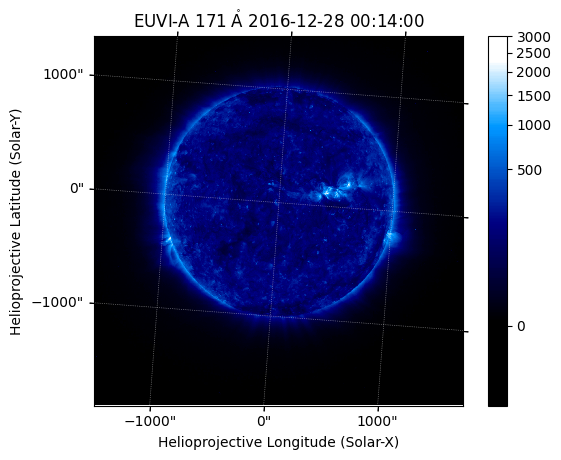

2025-02-14 07:27:49,209 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-02-14 07:27:49,213 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.


VSO == LO_YMD
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


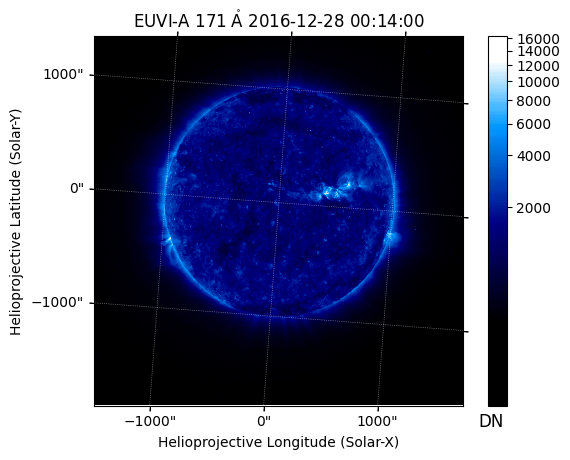

2025-02-14 07:27:49,622 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-02-14 07:27:49,626 - sunpy - INFO - Missing metadata for solar radius: assuming the standard radius of the photosphere.


Wavelet
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


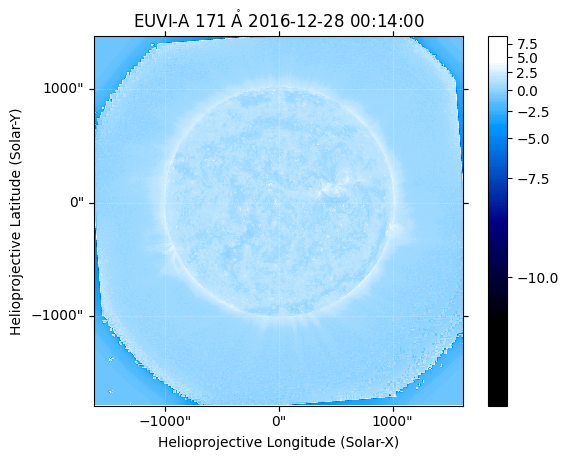

PNG


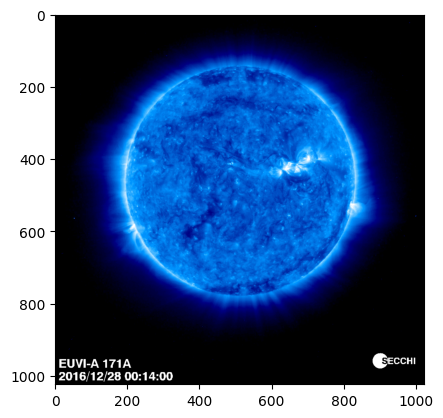

PNG Wavelet


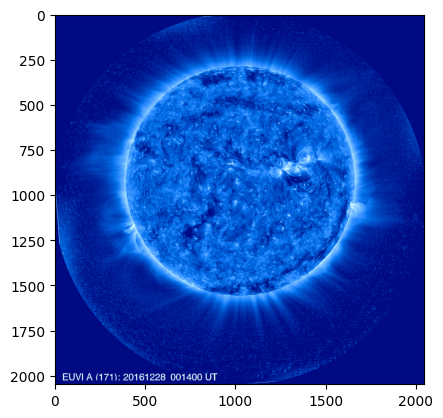

In [ ]:
print("Sample == PREP")
sample_map.peek()
# print("PREP")
# prep_map.peek()
print("VSO == LO_YMD")
vso_map.peek()
# print("LO_YMD")
# l0ymd_map.peek()
print("Wavelet")
wavelet_map.peek()
print("PNG")
plt.imshow(np.array(png.convert("RGB")))
plt.show()
print("PNG Wavelet")
plt.imshow(np.array(png_wavelet.convert("RGB")))
plt.show()

### Meta

In [ ]:
print("Sample")
print(sample_map.meta)
print()
print("PREP")
print(prep_map.meta)
print()
print("VSO")
print(vso_map.meta)
print()
print("LOYMD")
print(l0ymd_map.meta)
print()
print("Wavelet")
print(wavelet_map.meta)
print()

Sample
('simple': 'True')
('bitpix': '-32')
('naxis': '2')
('naxis1': '2048')
('naxis2': '2048')
('date-obs': '2016-12-28T00:14:00.006')
('time_obs': '')
('fileorig': 'GC280019.443')
('seb_prog': 'NORMAL')
('sync': 'False')
('spwx': 'False')
('expcmd': '8.00358')
('exptime': '8.00387')
('dstart1': '1')
('dstop1': '2048')
('dstart2': '1')
('dstop2': '2048')
('p1col': '51')
('p2col': '2098')
('p1row': '1')
('p2row': '2048')
('r1col': '129')
('r2col': '2176')
('r1row': '79')
('r2row': '2126')
('rectify': 'True')
('rectrota': '4')
('ledcolor': 'NONE')
('ledpulse': '0')
('offset': '600')
('biasmean': '726.339')
('biassdev': '0.02')
('gaincmd': '1')
('gainmode': 'HIGH')
('summed': '1.0')
('sumrow': '1')
('sumcol': '1')
('ceb_t': '46')
('temp_ccd': '-66.677')
('polar': '-1.0')
('encoderp': '22')
('wavelnth': '171')
('encoderq': '22')
('filter': 'S1')
('encoderf': '22')
('fps_on': 'True')
('obs_prog': '')
('doorstat': '2')
('shuttdir': 'CW')
('read_tbl': '0')
('clr_tbl': '1')
('readfile': 'ops